In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  5 18:55:10 2019

@author: sidhant
"""

import numpy as nm
import pandas as pd
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score,classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt    
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score










C:\Users\abhin\Anaconda3\envs\ml1P13\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def preprocess_data(x): 
    data= pd.read_csv(x)
    #print(data.describe())
    data=data.drop(['id','asins','categories','count','dimension','descriptions','ean','flavors','imageURLs','isbn','keys','manufacturerNumber','prices.availability','prices.color','prices.count','prices.dateAdded','prices.dateSeen','prices.flavor','prices.offer','prices.returnPolicy','prices.source','prices.sourceURLs','prices.warranty','reviews','skus','sourceURLs','upc','vin','websiteIDs',],axis=1)

    #null_columns=data.columns[data.isnull().any()]
    #print((data['brand'].isnull()).head(20))
    #print(data.info())

    #############combine 2 column with their mean ##################################
    price=data[['prices.amountMax','prices.amountMin']].mean( axis=1) #taking mean of 2 columns to get avprice
    data=data.drop(['prices.amountMax','prices.amountMin'],axis=1)
    data['averagePrice']=price
    #############################END###############################################


    #############brand column data preprocessing##################################
    count=0
    data.brand.fillna(data.manufacturer,inplace=True)
    data=data.drop(['manufacturer'],axis=1)

    #null_columns=data.columns[data.isnull().any()]
    #print(data[null_columns].isnull().sum())
    #print(data['brand'].value_counts().index[0])    #mode imputation 
    encoder=ce.BinaryEncoder(cols=['brand'])
    data=encoder.fit_transform(data)
    #print(data['brand'])
    #############################END##############################################


    ################colors column data preprocessing###############################
    #print(data['colors'].describe())
    #print((data['colors'].values =='').sum())#####check for null values in column

    data=data.drop(data[data['colors']=='b,c,a,d'].index)
    data=data.drop(data[data['colors']=='c,d,a,b'].index)
    data=data.drop(data[data['colors']=='d,b,a,c'].index)
    data=data.drop(data[data['colors']=='a,c,b'].index)
    data.colors=data.colors.fillna(data['colors'].value_counts().index[0])   #mode imputation for blank values

    #print((data.colors.values =='').sum())
    #
    #null_columns=data.columns[data.isnull().any()]
    #print(data[null_columns].isnull().sum())#####check for null values in column


    #print(data['colors'].unique())######check for unique value set
    #print(len(data['colors'].unique()))######check for unique value set

    encoder=ce.BinaryEncoder(cols=['colors'])
    data=encoder.fit_transform(data)

    ######################END#####################################################


    #######################merchants column data processing#######################
    #print((data['prices.merchant']).count())
    data= data.dropna(axis=0,subset=['prices.merchant'])
    #print((data['prices.merchant']).count())
    data['merchants']=data['prices.merchant']
    data=data.drop(['prices.merchant'],axis=1)

    encoder=ce.BinaryEncoder(cols=['merchants'])
    data=encoder.fit_transform(data)
    #data['merchants']= data['merchants'].astype('category')
    #data['merchants']= data['merchants'].cat.codes

    #######################END####################################################


    #######################name column data processing############################

    encoder=ce.BinaryEncoder(cols=['name'])
    data=encoder.fit_transform(data)
    #data['name']= data['name'].astype('category')
    #data['name']= data['name'].cat.codes

    #######################END####################################################


    ######################price.size & price.condition column data processing############################
    data= data.dropna(axis=0,subset=['prices.condition'])
    #data=data.dropna(subset=['prices.condition', 'prices.size'], how='all')
    data['prices.size']=data['prices.size'].fillna(data['prices.size'].value_counts().index[0])
    #print(data['prices.condition'].unique())


    encoder=ce.BinaryEncoder(cols=['prices.size'])
    data=encoder.fit_transform(data)

    #data['prices.size']= data['prices.size'].astype('category')
    #data['prices.size']= data['prices.size'].cat.codes
    encoder=ce.BinaryEncoder(cols=['prices.condition'])
    data=encoder.fit_transform(data)
    #data['prices.condition']= data['prices.condition'].astype('category')
    #data['prices.condition']= data['prices.condition'].cat.codes



    #######################END####################################################


    ###############################prices.isSale###################################
    encoder=ce.BinaryEncoder(cols=['prices.currency'])
    data=encoder.fit_transform(data)

    data['prices.isSale']= data['prices.isSale'].astype('category')
    data['prices.isSale']= data['prices.isSale'].cat.codes


    data=data.drop(['dateAdded','dateUpdated','features','weight','sizes','prices.shipping','quantities'],axis=1)

    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

    #################################END###########################################

    X=data.drop(['averagePrice'],axis=1)
    Y=data['averagePrice']
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=3)
    return Xtrain,Xtest,Ytrain,Ytest




In [3]:
def decisionTree(Xtrain,Xtest,Ytrain,Ytest):

    print("###################RegressionTree###############")
    model= DecisionTreeRegressor(max_depth=9)
    model.fit(Xtrain,Ytrain)
    y_test_predict=model.predict(Xtest)
    y_train_predict=model.predict(Xtrain)
    meansqr_test=mse(Ytest, y_test_predict)
    meansqr_train=mse(Ytrain, y_train_predict)
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    rmse_train = (nm.sqrt(mean_squared_error(Ytrain, y_train_predict)))
    abc=r2_score(Ytest,y_test_predict)
    ab=model.score(Xtest,Ytest)
    print("accuracy=",ab)
    print("RMSE for test data=",rmse_test)
    print("RMSE for training data=",rmse_train)
    print("MSE for test data=",meansqr_test)
    print("MSE for training data=",meansqr_train)
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    return model,ab




#print("###############NeuralNet###############################")
#
#X_NN=data.drop(['prices.isSale'],axis=1)  
#Y_NN=data['prices.isSale']
#
#Xtrain_NN,Xtest_NN,Ytrain_NN,Ytest_NN=train_test_split(X_NN,Y_NN,test_size=0.25,random_state=3)
#
#mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
#mlp.fit(Xtrain_NN, Ytrain_NN)  
#
#predictions = mlp.predict(Xtest_NN)  
#
#
#print("Accuracy", metrics.accuracy_score(Ytest_NN, predictions))
#print(confusion_matrix(Ytest_NN,predictions))  
#print(classification_report(Ytest_NN,predictions))
#
#rmse_NNtest = (nm.sqrt(mean_squared_error(Ytest_NN, predictions)))
#meansqr_NNtest=mse(Ytest_NN, predictions)
#print("RMSE =",rmse_NNtest)
#print("MSE =",meansqr_NNtest)
#
#print("Accuracy on training set: {:.3f}".format(mlp.score(Xtrain_NN, Ytrain_NN)))
#print("Accuracy on test set: {:.3f}".format(mlp.score(Xtest_NN, Ytest_NN)))


In [4]:
def linearRegression(Xtrain,Xtest,Ytrain,Ytest):    
    model=LinearRegression()
    model.fit(Xtrain,Ytrain)

    y_test_predict=model.predict(Xtest)
    y_train_predict=model.predict(Xtrain)
    meansqr_test=mse(Ytest, y_test_predict)
    meansqr_train=mse(Ytrain, y_train_predict)
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    rmse_train = (nm.sqrt(mean_squared_error(Ytrain, y_train_predict)))
    abc=r2_score(Ytest,y_test_predict)
    ab=model.score(Xtest,Ytest)
    print("###################LinearRegression###############")
    print("accuracy=",ab)
    print("RMSE for test data=",rmse_test)
    print("RMSE for training data=",rmse_train)
    print("MSE for test data=",meansqr_test)
    print("MSE for training data=",meansqr_train)
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    return model,ab

In [22]:
def mlpregressor(Xtrain,Xtest,Ytrain,Ytest):    
    
    model = MLPRegressor(hidden_layer_sizes=(32,128,512))
    
    model.fit(Xtrain,Ytrain)
    #print(model)

        # make predictions
    expected_y  = Ytest
    y_test_predict=model.predict(Xtest)
    y_train_predict=model.predict(Xtrain)

    meansqr_test=mse(Ytest, y_test_predict)
    meansqr_train=mse(Ytrain, y_train_predict)
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    rmse_train = (nm.sqrt(mean_squared_error(Ytrain, y_train_predict)))
    abc=r2_score(Ytest,y_test_predict)
    ab=model.score(Xtest,Ytest)
    print("###################NeuralNetwork###############")
    print("accuracy=",ab)
    print("RMSE for test data=",rmse_test)
    print("RMSE for training data=",rmse_train)
    print("MSE for test data=",meansqr_test)
    print("MSE for training data=",meansqr_train)
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    #Snippet_165()
    return model,ab
    


In [6]:
def GBRegressor(Xtrain,Xtest,Ytrain,Ytest):   
    model = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                        learning_rate=0.1, loss='huber',
                                        random_state=1)
    model.fit(Xtrain,Ytrain)
    y_test_predict=model.predict(Xtest)
    y_train_predict=model.predict(Xtrain)

    meansqr_test=mse(Ytest, y_test_predict)
    meansqr_train=mse(Ytrain, y_train_predict)
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    rmse_train = (nm.sqrt(mean_squared_error(Ytrain, y_train_predict)))
    abc=r2_score(Ytest,y_test_predict)
    ab=model.score(Xtest,Ytest)
    print("###################GradientBoosting###############")
    print("accuracy=",ab)
    print("RMSE for test data=",rmse_test)
    print("RMSE for training data=",rmse_train)
    print("MSE for test data=",meansqr_test)
    print("MSE for training data=",meansqr_train)
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    #Snippet_165()
    return model,ab


In [7]:
def svm(Xtrain,Xtest,Ytrain,Ytest):
    model=SVR()
    model.fit(Xtrain,Ytrain)
    y_test_predict=model.predict(Xtest)
    y_train_predict=model.predict(Xtrain)

    meansqr_test=mse(Ytest, y_test_predict)
    meansqr_train=mse(Ytrain, y_train_predict)
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    rmse_train = (nm.sqrt(mean_squared_error(Ytrain, y_train_predict)))
    abc=r2_score(Ytest,y_test_predict)
    ab=model.score(Xtest,Ytest)
    print("###################SVM###############")
    print("accuracy=",ab)
    print("RMSE for test data=",rmse_test)
    print("RMSE for training data=",rmse_train)
    print("MSE for test data=",meansqr_test)
    print("MSE for training data=",meansqr_train)
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    return model,ab

In [14]:
def ensemble_output(models,Xtest,Ytest):
    prediction=nm.zeros(Xtest.shape[0])
    total_acc=0
    for model in models:
        total_acc=total_acc+model[1]
    print(total_acc)
    for model in models:
        prediction=prediction+model[0].predict(Xtest)*(model[1]/total_acc)
   # y_test_predict=prediction/len(models)
    y_test_predict=prediction
    
    meansqr_test=mse(Ytest, y_test_predict)
   
    rmse_test = (nm.sqrt(mean_squared_error(Ytest, y_test_predict)))
    
    abc=r2_score(Ytest,y_test_predict)
    
    
    print("###################Ensemble###############")
    print("accuracy=",abc)
    print("RMSE for test data=",rmse_test)
    
    print("MSE for test data=",meansqr_test)
    
    print("")
    print("")
    sns.regplot(Ytest, y_test_predict, fit_reg=True, scatter_kws={"s": 100})
    plt.show()
    
    

###################RegressionTree###############
accuracy= 0.9007305274322763
RMSE for test data= 67.5408695100997
RMSE for training data= 71.29065590199201
MSE for test data= 34.509460571071685
MSE for training data= 31.74894158061407




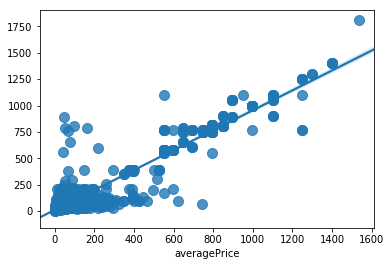

###################LinearRegression###############
accuracy= 0.7244419815388123
RMSE for test data= 112.52922211077482
RMSE for training data= 128.7371415796259
MSE for test data= 69.3394582399812
MSE for training data= 72.48491842916516




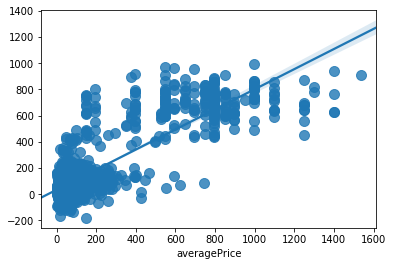

###################NeuralNetwork###############
accuracy= 0.9188770166453822
RMSE for test data= 61.056337177901725
RMSE for training data= 58.602702844337536
MSE for test data= 35.10537162693974
MSE for training data= 29.43293583708374




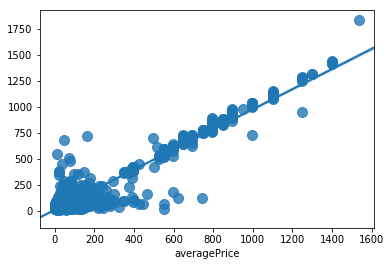

###################GradientBoosting###############
accuracy= 0.8493244772475971
RMSE for test data= 83.21088549292553
RMSE for training data= 104.44291545302697
MSE for test data= 40.44166643035954
MSE for training data= 41.62876673578906




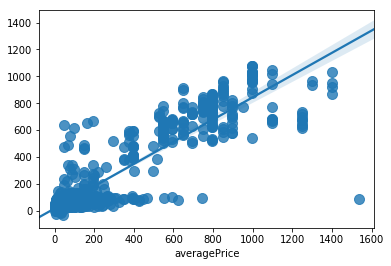

###################SVM###############
accuracy= 0.08541531626010201
RMSE for test data= 205.0079732895669
RMSE for training data= 216.84558017784155
MSE for test data= 85.81444980024705
MSE for training data= 84.94536667117673




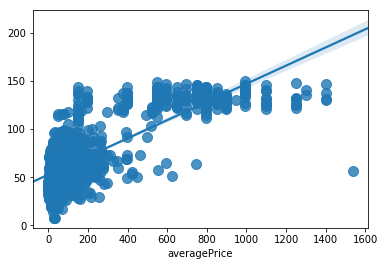

3.47878931912417
###################Ensemble###############
accuracy= 0.9087356445676672
RMSE for test data= 64.76037957730847
MSE for test data= 38.854523188486624




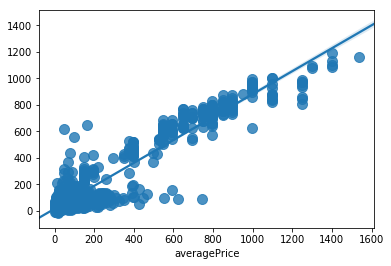

In [23]:
Xtrain,Xtest,Ytrain,Ytest = preprocess_data("7210_1.csv")
models=[]
models.append(decisionTree(Xtrain,Xtest,Ytrain,Ytest))
models.append(linearRegression(Xtrain,Xtest,Ytrain,Ytest))
models.append(mlpregressor(Xtrain,Xtest,Ytrain,Ytest))
models.append(GBRegressor(Xtrain,Xtest,Ytrain,Ytest))
models.append(svm(Xtrain,Xtest,Ytrain,Ytest))
ensemble_output(models,Xtest,Ytest)
